In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from main import *

cwd = os.getcwd()

In [7]:
# Simulate a desired signal (clean) and a noisy signal with varying noise amplitude
np.random.seed(42)
n_samples = 1000
t = np.arange(n_samples)

# Desired signal: a simple sinusoidal wave
desired_signal = np.sin(0.02 * t)

# Input signal with varying noise amplitude
noise = 0.2 * np.random.randn(n_samples)
noise[200:400] += 1 * np.random.randn(200)  # High amplitude noise in this range
noise[600:800] += 1.4 * np.random.randn(200)  # Even higher amplitude noise in this range
input_signal = desired_signal + noise

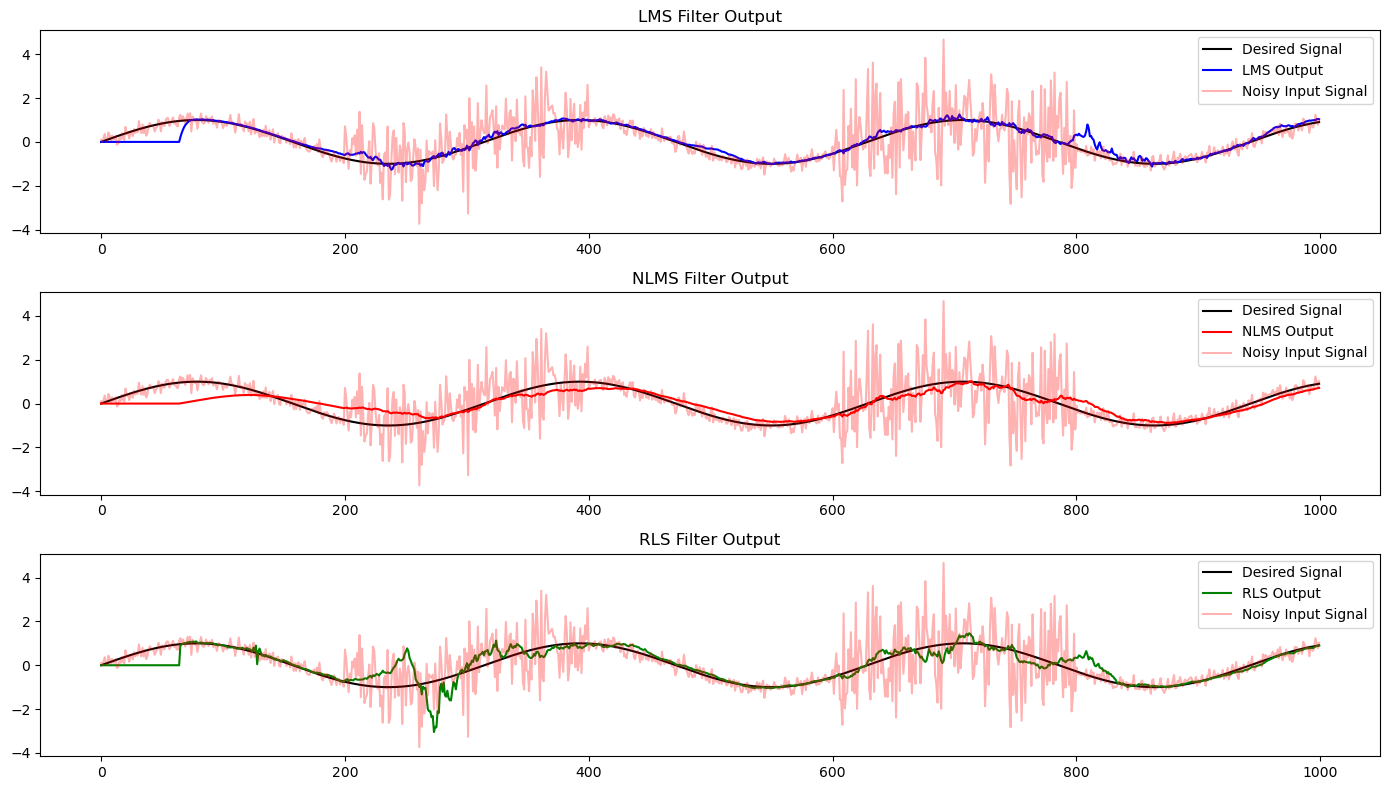

In [8]:
FILTER_ORDER = 64

output_lms, error_lms = lms_filter(desired_signal, input_signal, filter_order=FILTER_ORDER)
output_nlms, error_nlms = nlms_filter(desired_signal, input_signal, filter_order=FILTER_ORDER)
output_rls, error_rls = rls_filter(desired_signal, input_signal, filter_order=FILTER_ORDER)
# Plot results
plt.figure(figsize=(14, 8))

# Plot LMS filtered output
plt.subplot(3, 1, 1)
plt.plot(t, desired_signal, label='Desired Signal', color='black')
plt.plot(t, output_lms, label='LMS Output', color='blue')
plt.plot(t, input_signal, label='Noisy Input Signal', color='red', alpha=0.3)
plt.title("LMS Filter Output")
plt.legend()

# Plot NLMS filtered output
plt.subplot(3, 1, 2)
plt.plot(t, desired_signal, label='Desired Signal', color='black')
plt.plot(t, output_nlms, label='NLMS Output', color='red')
plt.plot(t, input_signal, label='Noisy Input Signal', color='red', alpha=0.3)
plt.title("NLMS Filter Output")
plt.legend()

# Plot RLS filtered output
plt.subplot(3, 1, 3)
plt.plot(t, desired_signal, label='Desired Signal', color='black')
plt.plot(t, output_rls, label='RLS Output', color='green')
plt.plot(t, input_signal, label='Noisy Input Signal', color='red', alpha=0.3)
plt.title("RLS Filter Output")
plt.legend()
plt.tight_layout()

save_path = os.path.join(cwd, "plot_filter_outputs.png")
plt.savefig(save_path)

plt.show()

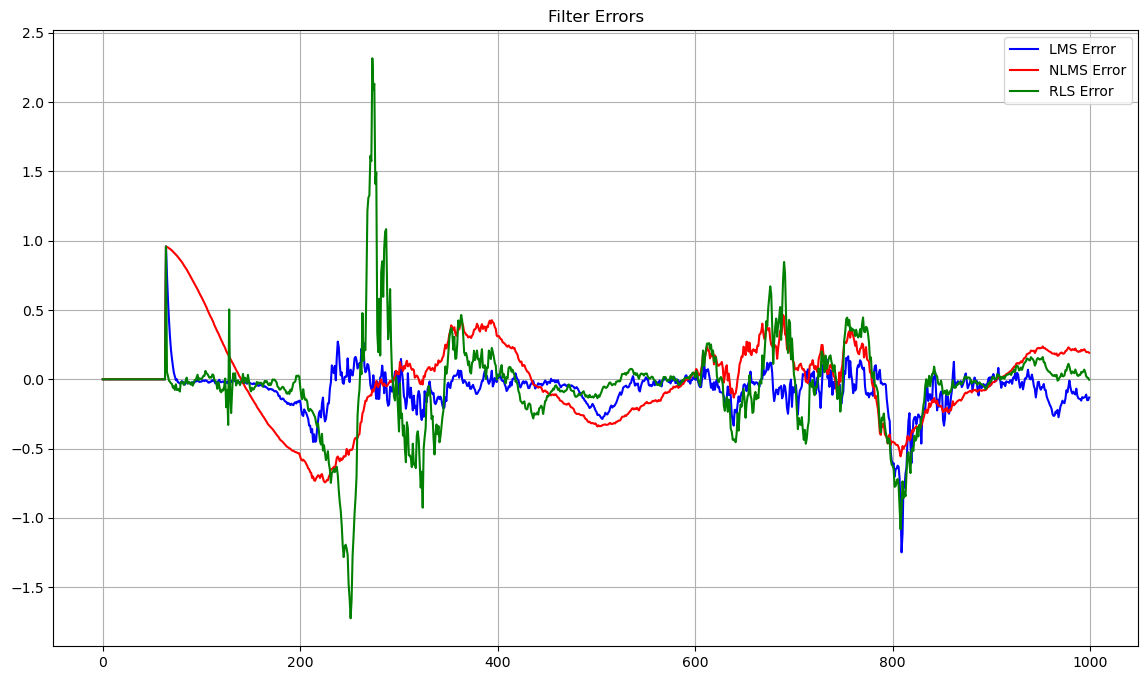

In [9]:
plt.figure(figsize=(14, 8))
# Plot Error
plt.plot(t, error_lms, label='LMS Error', color='blue')
plt.plot(t, error_nlms, label='NLMS Error', color='red')
plt.plot(t, error_rls, label='RLS Error', color='green')
plt.title("Filter Errors")
plt.legend()

plt.grid(True)

save_path = os.path.join(cwd, "plot_error.png")
plt.savefig(save_path)

plt.show()